### Logistic Regression

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#数据获取(getData)
data = np.loadtxt("ex2data1.txt", dtype = np.float, delimiter = ',') #读取数据
data

array([[34.62365962, 78.02469282,  0.        ],
       [30.28671077, 43.89499752,  0.        ],
       [35.84740877, 72.90219803,  0.        ],
       [60.18259939, 86.3085521 ,  1.        ],
       [79.03273605, 75.34437644,  1.        ],
       [45.08327748, 56.31637178,  0.        ],
       [61.10666454, 96.51142588,  1.        ],
       [75.02474557, 46.55401354,  1.        ],
       [76.0987867 , 87.42056972,  1.        ],
       [84.43281996, 43.53339331,  1.        ],
       [95.86155507, 38.22527806,  0.        ],
       [75.01365839, 30.60326323,  0.        ],
       [82.30705337, 76.4819633 ,  1.        ],
       [69.36458876, 97.71869196,  1.        ],
       [39.53833914, 76.03681085,  0.        ],
       [53.97105215, 89.20735014,  1.        ],
       [69.07014406, 52.74046973,  1.        ],
       [67.94685548, 46.67857411,  0.        ],
       [70.66150955, 92.92713789,  1.        ],
       [76.97878373, 47.57596365,  1.        ],
       [67.37202755, 42.83843832,  0.   

In [4]:
#数据处理(precessData)
"""
index = np.lexsort([data[:, 2]]) # 按第3列值得出排序后的行索引
data_sort = data[index, :]
"""
x = data[:, :2]
y = data[:, 2]            #已降维，若y = date[:, 2:],则y和data维度一样
#y_int = y.astype(np.int)  #将y中的元素转换为int类型，原y的类型不变
index0 = np.where(y == 0) #获取分类为0的索引
index1 = np.where(y == 1) #获取分类为1的索引
#分别按索引获取不同分类的数据
nagetive = x[index0] 
positive = x[index1]
xn = nagetive[:, 0]
yn = nagetive[:, 1]
xp = positive[:, 0]
yp = positive[:, 1]

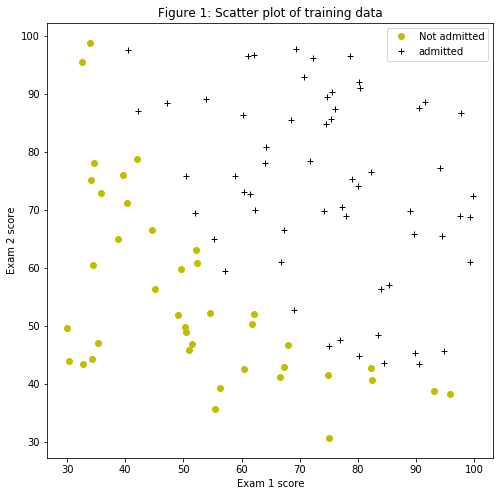

In [5]:
#数据展示(plotData)
plt.figure( figsize = (8,8))
plt.plot(xn, yn, 'yo', xp, yp, 'k+')
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.title("Figure 1: Scatter plot of training data")
plt.legend(labels=["Not admitted", "admitted"],loc = 'upper right') #添加图例
plt.show()

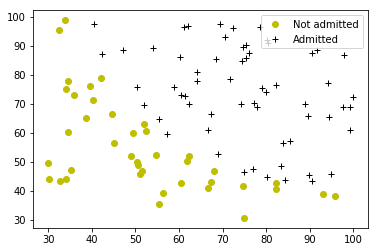

In [648]:
#面向对象绘制方式
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
f1 = ax.plot(xn, yn, 'yo', label = "Not admitted")
f2 = ax.plot(xp, yp, 'k+', label = "Admitted")
ax.legend(loc = 'upper right' )  #显示图例
plt.show()

In [6]:
# Sigmoid function
def sigmoid(z):
    g = 1/(1 + np.exp(-z))
    return g

### 若theta的初始值取[0, 0, 0]，则梯度下降法只能到达局部最优解
**因此，为了能选好theta的初始值，可以先通过数据图推测大概的决策边界函数然后得出初始theta值**

In [7]:
xm = [min(x[:,0])-2, max(x[:,0])+2]
ym = [max(x[:,1])+2, min(x[:,1])-2]
k = (ym[1] - ym[0]) / (xm[1] - xm[0])
b = ym[0] - k*xm[0]
theta = np.array([-b, -k, 1])/6     #如果加负号，则预测结果相反，如果不除以5，则后面计算J时回出现log0溢出
theta

array([-21.39277144,   0.16327124,   0.16666667])

In [8]:
# Cost function
m = np.size(y)
#theta = np.zeros((3))
#theta = np.array([-25.16127, 0.20623, 0.20147])
h = sigmoid(theta[0] + theta[1] * x[:, 0] + theta[2] * x[:, 1])
J = (1/m) * np.sum(- y*np.log(h) - (1-y)*np.log(1-h))

### [Difference between np.mat(or np.asmatrix) and np.matrix](https://docs.scipy.org/doc/numpy/reference/generated/numpy.mat.html)
Unlike `matrix`, `asmatrix` does not make a copy if the input is already a matrix or an ndarray.  Equivalent to ``matrix(data, copy=False)``.

In [298]:
# 方法二：通过np.mat将array转换为matrix，再做矩阵乘法，最后再转换回array
Xm = np.hstack(( np.mat(np.ones((m, 1))), np.mat(x)))  # 按列推叠矩阵(列数增加)，np.vstack()为按行堆叠(行数增加)
h1 = sigmoid(np.array(Xm * np.mat(theta).T).reshape((m, ))) #  .T 为装置，.I 为求逆

In [9]:
# Gradient
alpha = 0.001
iterations = 50
CostJ = []
for i in range(iterations):
    t1 = theta[0] - (alpha/m) * np.sum(h - y)
    t2 = theta[1] - (alpha/m) * np.sum((h - y) * x[:, 0])
    t3 = theta[2] - (alpha/m) * np.sum((h - y) * x[:, 1])
    theta[0] = t1
    theta[1] = t2
    theta[2] = t3
    J = (1/m) * np.sum(- y*np.log(h) - (1-y)*np.log(1-h))
    CostJ.append(J)
    h = sigmoid(theta[0] + theta[1] * x[:, 0] + theta[2] * x[:, 1])

In [10]:
min(CostJ)

0.2059330388451858

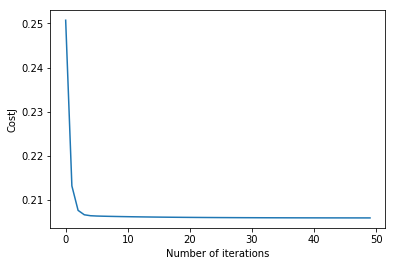

In [11]:
#CostJ value with iterations at alpha=0.001
plt.plot(list(range(iterations)), CostJ,)
plt.xlabel("Number of iterations")
plt.ylabel("CostJ")
plt.show()

In [26]:
theta

array([-21.3927054 ,   0.1755598 ,   0.17153059])

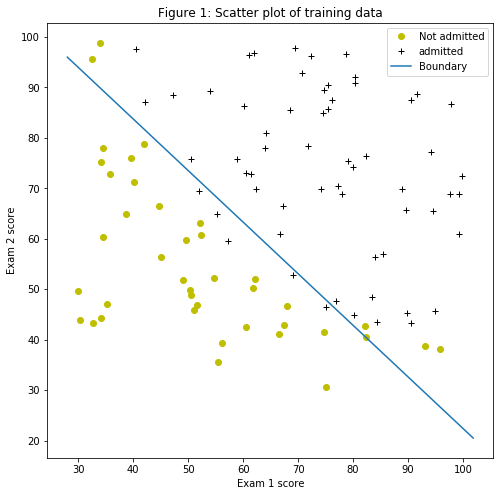

In [12]:
#绘制决策边界(plotDecisionBoundary）

xd = np.array([min(x[:, 0])-2, max(x[:, 0])+2])
yd = (theta[0] + theta[1] * xd) * (-1/theta[2])

plt.figure( figsize = (8,8))
plt.plot(xn, yn, 'yo', xp, yp, 'k+')
plt.plot(xd, yd)
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.title("Figure 1: Scatter plot of training data")
plt.legend(labels=["Not admitted", "admitted", "Boundary"],loc = 'upper right') #添加图例
plt.show()

In [13]:
#预测数据(predict)
test = np.array([45, 85])
probability = sigmoid(theta[0] + np.sum(theta[1:] * test))
probability

0.7479267618856063

In [21]:
#准确度计算(Accuracy)
res = 0
for i in range(m):
    if sigmoid(theta[0] + np.sum(theta[1:] * x[i, :])) >= 0.5:
        p = 1
    else:
        p = 0
    if p == y[i]:
        res += 1
print("Train Accuracy: {:.2%}".format(res/m))

Train Accuracy: 89.00%
